<a href="https://colab.research.google.com/github/Sleeppyheadd/128-356-Big-Data-for-test/blob/main/bigdata_week3_sql_duckdb_to_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/witsarutsarai12-Academic/128-356-Big-Data/blob/main/BigData_Week3_SQL_DuckDB_to_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data : SQL Analytics ด้วย DuckDB → Spark SQL

> เป้าหมายวันนี้: ใช้ **SQL** เพื่อ “ถามข้อมูล” จากไฟล์ใหญ่ (CSV/Parquet) ด้วย **DuckDB** และเข้าใจแนวคิด performance แบบที่ย้ายไปใช้ **Spark SQL** ต่อได้

**ใช้ได้ทั้ง**: Google Colab (แนะนำ) / Local Jupyter  

---


##  รู้จัก Bash Commands เบื้องต้น

<img src="https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/bash_cmd.png?raw=1"  width="700" style="max-width:100%; height:auto;"/>

### ทำไมต้องเรียนรู้ Command Line?

ในโลกของ Data Engineering และ Big Data เราจะต้องทำงานกับ:
- **Remote Servers** (เซิร์ฟเวอร์ที่อยู่ใน Cloud เช่น AWS EC2, Google Cloud)
- **Data Lakes** (ข้อมูลที่เก็บบน S3, HDFS)
- **Cluster Computing** (Spark Cluster ที่มีหลายเครื่อง)

ในสถานการณ์เหล่านี้ เรา**ไม่มี GUI** (Graphical User Interface) ให้คลิกเหมือนบน Windows/Mac
เราต้องใช้ **Command Line Interface (CLI)** หรือที่เรียกว่า **Terminal/Bash** ในการทำงาน

### ประโยชน์ของ Bash Commands:
1. **ตรวจสอบไฟล์ก่อนโหลด**: ดูว่าไฟล์มีขนาดเท่าไหร่ มีกี่บรรทัด หน้าตาข้อมูลเป็นอย่างไร
2. **ประหยัดเวลา**: ไม่ต้องรอ Download ไฟล์ขนาดใหญ่มาดูในเครื่อง
3. **Automation**: เขียน Script เพื่อทำงานซ้ำ ๆ อัตโนมัติ
4. **ทำงานกับ Big Data**: ไฟล์ขนาด GB-TB ไม่สามารถเปิดด้วย Excel ได้

### คำสั่งพื้นฐานที่ต้องรู้:

#### 1. `pwd` (Print Working Directory)
- **ความหมาย**: แสดงตำแหน่งปัจจุบันที่เราอยู่
- **ตัวอย่าง**: `/home/username/data`
- **เมื่อไหร่ใช้**: เมื่อหลงทางว่าตอนนี้อยู่โฟลเดอร์ไหน

#### 2. `ls` (List)
- **ความหมาย**: แสดงรายชื่อไฟล์และโฟลเดอร์ในตำแหน่งปัจจุบัน
- **ตัวอย่าง**: `ls` → แสดงชื่อไฟล์
- **Options ที่ใช้บ่อย**:
  - `ls -l` → แสดงแบบละเอียด (สิทธิ์, ขนาด, วันที่)
  - `ls -lh` → แสดงขนาดไฟล์ในรูปแบบที่คนอ่านง่าย (MB, GB แทนที่จะเป็น bytes)
  - `ls -a` → แสดงไฟล์ที่ซ่อนอยู่ (ขึ้นต้นด้วย `.`)

#### 3. `cd` (Change Directory)
- **ความหมาย**: เปลี่ยนโฟลเดอร์
- **ตัวอย่าง**:
  - `cd data` → เข้าไปในโฟลเดอร์ data
  - `cd ..` → ย้อนกลับไปโฟลเดอร์ก่อนหน้า
  - `cd ~` → กลับไปที่ Home directory

#### 4. `head` (แสดงบรรทัดแรก)
- **ความหมาย**: แสดง 10 บรรทัดแรกของไฟล์ (Default)
- **ตัวอย่าง**:
  - `head sample_data/california_housing_train.csv` → ดู 10 บรรทัดแรก
  - `head -n 5 sample_data/california_housing_train.csv` → ดู 5 บรรทัดแรก
- **เมื่อไหร่ใช้**: ต้องการดูว่าไฟล์มี Header อะไรบ้าง หรือข้อมูลหน้าตาเป็นอย่างไร

#### 5. `tail` (แสดงบรรทัดท้าย)
- **ความหมาย**: แสดง 10 บรรทัดสุดท้ายของไฟล์
- **ตัวอย่าง**: `tail -n 20 sample_data/california_housing_train.csv` → ดู 20 บรรทัดสุดท้าย
- **เมื่อไหร่ใช้**: ดูว่าไฟล์มีข้อมูลครบหรือไม่ หรือดู Log ล่าสุด

#### 6. `cat` (Concatenate)
- **ความหมาย**: แสดงเนื้อหาทั้งหมดของไฟล์
- **ตัวอย่าง**: `cat small_file.txt`
- **⚠️ คำเตือน**: อย่าใช้กับไฟล์ใหญ่! จอจะท่วมและอาจค้าง

#### 7. `wc` (Word Count)
- **ความหมาย**: นับจำนวนบรรทัด, คำ, bytes
- **ตัวอย่าง**:
  - `wc -l sample_data/california_housing_train.csv` → นับจำนวนบรรทัด (มีข้อมูลกี่แถว)
  - `wc -c sample_data/california_housing_train.csv` → นับจำนวน bytes (ขนาดไฟล์)

#### 8. `grep` (ค้นหาข้อความ)
- **ความหมาย**: ค้นหาบรรทัดที่มีคำที่ระบุ
- **ตัวอย่าง**: `grep "THEFT" sample_data/california_housing_train.csv` → แสดงเฉพาะบรรทัดที่มีคำว่า THEFT

### การใช้งานใน Jupyter/Colab

ใน Jupyter Notebook หรือ Google Colab เราสามารถรันคำสั่ง Bash ได้โดยเติม `!` ข้างหน้า:

```python
!pwd                    # ดูว่าอยู่โฟลเดอร์ไหน
!ls -lh                 # ดูไฟล์ในโฟลเดอร์
!head -n 5 sample_data/california_housing_train.csv    # ดู 5 บรรทัดแรก
!wc -l sample_data/california_housing_train.csv        # นับจำนวนบรรทัด
```

### ทำไมต้องเช็คก่อนโหลดข้อมูล?

**สถานการณ์จริง**:
1. คุณเจอไฟล์ `sales_data.csv` บน S3
2. ถ้า Download มาเลย อาจพบว่า:
   - ไฟล์ใหญ่ 50 GB (ใช้เวลา Download นาน)
   - ไฟล์เสีย (มีแต่ Header ไม่มีข้อมูล)
   - Format ผิด (คั่นด้วย `;` แทน `,`)
3. ถ้าใช้ `head` ดูก่อน จะรู้ทันทีว่าไฟล์มีปัญหาหรือไม่

> **💡 Best Practice**: ก่อน Load ข้อมูลด้วย Python/SQL ให้ใช้ Bash ตรวจสอบก่อนเสมอ!


In [ ]:
# ตัวอย่างการใช้ Bash Commands ใน Jupyter/Colab
# (ลบ # ออกเพื่อรัน)

# !pwd                    # ดูว่าอยู่โฟลเดอร์ไหน
# !ls -lh                 # ดูไฟล์ทั้งหมดพร้อมขนาด
# !head -n 5 sample_data/california_housing_train.csv    # ดู 5 บรรทัดแรกของไฟล์
# !wc -l sample_data/california_housing_train.csv        # นับจำนวนบรรทัดทั้งหมด
# !grep 100 sample_data/california_housing_train.csv | head -n 3  # ค้นหาคำว่า THEFT และแสดง 3 บรรทัดแรก


## 0.1) History & Importance of SQL

<img src="https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/sql_timeline.png?raw=1" width="700" style="max-width:100%; height:auto;">

<img src="https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/sql_evolution.png?raw=1" width="700" style="max-width:100%; height:auto;">


### ประวัติย่อของ SQL (Structured Query Language)

SQL เป็นภาษาที่ใช้ในการจัดการข้อมูลในฐานข้อมูลเชิงสัมพันธ์ (Relational Database) มาตั้งแต่ยุค 1970 และยังคงเป็นมาตรฐานอุตสาหกรรมจนถึงปัจจุบัน

#### Timeline สำคัญ:
- **1970**: Edgar Codd นักวิจัยจาก IBM เผยแพร่บทความ *"A Relational Model of Data for Large Shared Data Banks"* ซึ่งเป็นรากฐานของ Relational Database
- **1974-1975**: IBM พัฒนา SEQUEL (Structured English Query Language) ซึ่งต่อมาเปลี่ยนชื่อเป็น SQL เพื่อใช้กับระบบ System R
- **1979**: Oracle Corporation (ชื่อเดิม Relational Software Inc.) เปิดตัว Oracle V2 ซึ่งเป็น RDBMS เชิงพาณิชย์ตัวแรกของโลก
- **1986**: ANSI (American National Standards Institute) ประกาศให้ SQL เป็นมาตรฐานอย่างเป็นทางการ
- **1987**: ISO (International Organization for Standardization) รับรอง SQL เป็นมาตรฐานสากล
- **ปัจจุบัน**: SQL ยังคงเป็นภาษาหลักในการจัดการข้อมูล ไม่ว่าจะเป็น RDBMS แบบดั้งเดิม, Data Warehouse, หรือแม้แต่ระบบ Big Data

### วิวัฒนาการของ SQL Engine

SQL เป็นเพียง **ภาษา** (Language) ที่เราใช้เขียนคำสั่ง แต่สิ่งที่ทำงานจริงคือ **Engine** หรือ **Database Management System (DBMS)** ซึ่งมีวิวัฒนาการตามความต้องการของยุคสมัย:

#### 1. RDBMS (Row-oriented) - ยุคแรก
- **ตัวอย่าง**: Oracle, PostgreSQL, MySQL, SQL Server
- **จุดเด่น**: เหมาะกับงาน **OLTP (Online Transaction Processing)** เช่น ระบบธนาคาร, ระบบ E-commerce
- **การจัดเก็บ**: เก็บข้อมูลเป็น **แถว** (Row) ทำให้การ Insert/Update/Delete เร็ว
- **ข้อจำกัด**: การวิเคราะห์ข้อมูลขนาดใหญ่ (Analytical Query) ช้า เพราะต้องอ่านทั้งแถวแม้ว่าจะใช้แค่บางคอลัมน์

#### 2. Data Warehouse (Column-oriented) - ยุคการวิเคราะห์
- **ตัวอย่าง**: Teradata, Netezza, Vertica, Amazon Redshift
- **จุดเด่น**: เหมาะกับงาน **OLAP (Online Analytical Processing)** เช่น รายงานยอดขาย, การวิเคราะห์แนวโน้ม
- **การจัดเก็บ**: เก็บข้อมูลเป็น **คอลัมน์** (Column) ทำให้การอ่านข้อมูลเฉพาะคอลัมน์ที่ต้องการเร็วมาก
- **เทคนิค**: รองรับ Compression ได้ดี เพราะข้อมูลในคอลัมน์เดียวกันมักมีรูปแบบคล้ายกัน

#### 3. Big Data Era (Distributed) - ยุคข้อมูลขนาดใหญ่
- **Apache Hive**: แปลง SQL เป็น MapReduce jobs ทำงานบน Hadoop (ช้า แต่รองรับข้อมูลขนาด Petabyte)
- **Spark SQL**: ประมวลผลแบบ In-Memory (เก็บข้อมูลในแรม) ทำให้เร็วกว่า Hive หลายเท่า รองรับทั้ง Batch และ Streaming
- **Presto/Trino**: Interactive Query Engine สามารถ Query ข้อมูลจากหลายแหล่ง (S3, MySQL, Postgres) พร้อมกันได้
- **จุดเด่น**: กระจายงานไปทำบนเครื่องหลายร้อย-หลายพันเครื่อง (Distributed Computing)

#### 4. Modern In-Process Analytics - ยุคปัจจุบัน
- **DuckDB**: ฐานข้อมูล OLAP ที่รันในเครื่องเดียว (In-Process) เหมือน SQLite แต่เน้นการวิเคราะห์
- **จุดเด่น**: ไม่ต้องติดตั้ง Server, รวดเร็วมาก, เหมาะกับ Data Scientist ที่ทำงานบน Laptop
- **ข้อจำกัด**: ถูกจำกัดด้วย RAM ของเครื่องเดียว (ไม่เหมาะกับข้อมูล TB-PB)

### ทำไม SQL ถึงสำคัญกับ Data Engineer/Scientist?

#### 1. Universal Interface (ภาษาสากล)
- ไม่ว่าข้อมูลจะอยู่ใน CSV, Parquet, PostgreSQL, MySQL, S3 Data Lake หรือแม้แต่ Google Sheets
- เราสามารถใช้ SQL เพื่อ Query ข้อมูลได้เกือบทั้งหมด
- **ตัวอย่าง**: DuckDB สามารถ Query ไฟล์ Parquet บน S3 ได้โดยตรงโดยไม่ต้อง Download

#### 2. Declarative Programming (บอกว่าต้องการอะไร ไม่ต้องบอกว่าทำอย่างไร)
- เราแค่เขียนว่า `SELECT name, SUM(sales) FROM orders WHERE year = 2023 GROUP BY name`
- Engine จะเป็นคนหาวิธีที่เร็วที่สุด (Query Optimization) เช่น:
  - ใช้ Index ถ้ามี
  - อ่านเฉพาะ Partition ที่จำเป็น
  - ทำ Parallel Processing
- ถ้าเขียนเป็น Python Loop เราต้องคิดเองทุกอย่าง และมักจะช้ากว่า

#### 3. Scalability (ขยายได้ตามขนาดข้อมูล)
- SQL เดียวกัน สามารถรันบน:
  - SQLite (ข้อมูล MB-GB บนมือถือ)
  - PostgreSQL (ข้อมูล GB-TB บน Server)
  - Spark SQL (ข้อมูล TB-PB บน Cluster)
- เราไม่ต้องเขียนโค้ดใหม่ เพียงแค่เปลี่ยน Engine

#### 4. Industry Standard (มาตรฐานอุตสาหกรรม)
- ทุกคนในทีม Data (Analyst, Engineer, Scientist) รู้จัก SQL
- ง่ายต่อการ Collaborate และ Maintain โค้ด
- มี Community และ Resources มากมาย

<img src="https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/sql_engine_types.png?raw=1" width="700" style="max-width:100%; height:auto;">

## 0) Setup & ติดตั้ง DuckDB (Colab)

> ถ้าเป็น Colab ให้รัน cell นี้ก่อน


In [3]:
# ติดตั้ง (Colab)
!pip -q install duckdb pandas pyarrow

import duckdb, pandas as pd, time, os
print("DuckDB version:", duckdb.__version__)

DuckDB version: 1.3.2


## 1) เตรียมไฟล์ข้อมูล

- ถ้าไฟล์อยู่ในโฟลเดอร์เดียวกับ notebook ให้ใส่ชื่อไฟล์ตรง ๆ
- ถ้าอยู่คนละที่ ให้ใส่ path เต็ม

> **หมายเหตุ**: ถ้ายังไม่มีไฟล์ในเครื่อง/Colab ให้ผู้สอนอัปโหลด หรือ mount Drive ก่อน


In [1]:
# ใช้ Dataset California Housing ที่มีอยู่แล้วใน Colab
CSV_PATH = "sample_data/california_housing_train.csv"
PARQUET_PATH = "housing.parquet"

import pandas as pd
import os

# สร้างไฟล์ Parquet จาก CSV เพื่อใช้ในการทดสอบ Performance (ถ้ายังไม่มี)
if not os.path.exists(PARQUET_PATH) and os.path.exists(CSV_PATH):
    print(f"🔨 กำลังสร้าง {PARQUET_PATH} จาก CSV...")
    pd.read_csv(CSV_PATH).to_parquet(PARQUET_PATH)
    print("✅ สร้างไฟล์ Parquet เสร็จสิ้น")

print("CSV exists:", os.path.exists(CSV_PATH))
print("Parquet exists:", os.path.exists(PARQUET_PATH))


🔨 กำลังสร้าง housing.parquet จาก CSV...
✅ สร้างไฟล์ Parquet เสร็จสิ้น
CSV exists: True
Parquet exists: True


In [ ]:
CSV_PATH = "sample_data/california_housing_train.csv"
df =pd.read_csv

## 2) สร้าง Connection + สร้าง VIEW

แนวคิด:
- เราจะ query ไฟล์โดยตรง (ไม่ต้อง import เข้า DB)
- สร้าง `VIEW` เพื่อเขียน SQL สั้นลง


In [4]:
con = duckdb.connect()

# CSV view
if os.path.exists(CSV_PATH):
    con.execute(f"""
        CREATE OR REPLACE VIEW housing_csv AS
        SELECT * FROM read_csv_auto('{CSV_PATH}');
    """)
    print("✅ created view: housing_csv")
else:
    print("⚠️ ไม่พบไฟล์ CSV_PATH")

# Parquet view
if os.path.exists(PARQUET_PATH):
    con.execute(f"""
        CREATE OR REPLACE VIEW housing_parquet AS
        SELECT * FROM read_parquet('{PARQUET_PATH}');
    """)
    print("✅ created view: housing_parquet")
else:
    print("⚠️ ไม่พบไฟล์ PARQUET_PATH")


✅ created view: housing_csv
✅ created view: housing_parquet


## 3) ดูตัวอย่างข้อมูลอย่างปลอดภัย (LIMIT)

> **ห้าม** `SELECT *` โดยไม่ใส่ `LIMIT` เวลาข้อมูลใหญ่


In [5]:
# เลือก view ที่มีอยู่จริง (parquet ถ้ามี จะ prefer เพราะเร็ว)
available = [v[0] for v in con.execute("SHOW TABLES").fetchall()]
table = "housing_parquet" if "housing_parquet" in available else ("housing_csv" if "housing_csv" in available else None)

assert table is not None, "ต้องมีอย่างน้อย housing data หรือ housing.parquet"

con.execute(f"SELECT * FROM {table} LIMIT 10").df()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


## 4) ตรวจ schema / ชนิดข้อมูล

> ถ้า type ผิด (เช่น year เป็นข้อความ) จะทำให้ sort/เงื่อนไขผิดได้


In [6]:
con.execute(f"DESCRIBE SELECT * FROM {table}").df()

,column_name,column_type,null,key,default,extra
0,longitude,DOUBLE,YES,None,None,None
1,latitude,DOUBLE,YES,None,None,None
2,housing_median_age,DOUBLE,YES,None,None,None
3,total_rooms,DOUBLE,YES,None,None,None
4,total_bedrooms,DOUBLE,YES,None,None,None
5,population,DOUBLE,YES,None,None,None
6,households,DOUBLE,YES,None,None,None
7,median_income,DOUBLE,YES,None,None,None
8,median_house_value,DOUBLE,YES,None,None,None


### SQL Logical Order of Execution (ลำดับการทำงานจริง)

ภาพด้านล่างแสดงลำดับที่ Database Engine ทำงานจริง ซึ่งต่างจากลำดับที่เราเขียน (Lexical Order)

![SQL Logical Order](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/sql_logical_order_v2.png?raw=1)

> **Note**: สังเกตว่า `SELECT` ทำงานเกือบสุดท้าย! นั่นเป็นเหตุผลว่าทำไมเราถึงใช้ Alias (ชื่อเล่น) ที่ตั้งใน SELECT ไปใช้ใน WHERE ไม่ได้


In [7]:
# ลองรันก่อน ถ้าคอลัมน์ไม่ตรง ให้แก้ชื่อคอลัมน์ใน SQL
con.execute(f"""
    SELECT median_house_value, housing_median_age, total_rooms
    FROM {table}
    WHERE housing_median_age > 50
    LIMIT 20
""").df()


,median_house_value,housing_median_age,total_rooms
0,128600.0,52.0,3419.0
1,270800.0,52.0,2606.0
2,300000.0,52.0,1506.0
3,331400.0,52.0,1484.0
4,83300.0,52.0,280.0
5,47500.0,52.0,204.0
6,163400.0,52.0,1969.0
7,185300.0,52.0,1512.0
8,213100.0,52.0,2676.0
9,221100.0,52.0,1911.0


### ✅ โจทย์ 1 (Easy)
1) นับจำนวนแถวทั้งหมดในตาราง  
2) แสดง 5 แถวแรก (เลือกเฉพาะ 3–5 คอลัมน์พอ)

เติม SQL ในช่องว่างด้านล่าง


# TODO: เติม SQL ให้ครบ
sql1 = f"""
SELECT median_house_value, housing_median_age, total_rooms AS n_rows
FROM {table}
"""

# sql2: เลือกคอลัมน์ 3-5 ตัว + LIMIT 5
sql2 = f"""
SELECT ________, ________, ________

1.   List ite



2.   List item


FROM {table}
LIMIT 5
"""

# รัน
try:
    print(con.execute(sql1).df())
    display(con.execute(sql2).df())
except Exception as e:
    print("❌ Error:", e)

## 6) Aggregation: GROUP BY / ORDER BY

แนวคิด: Big Data ไม่ดูทีละแถว → สรุปภาพรวม


In [ ]:
con.execute(f"""
    SELECT
      housing_median_age,
      COUNT(*) AS total_houses,
      AVG(median_house_value) AS avg_price
    FROM {table}
    GROUP BY housing_median_age
    ORDER BY total_houses DESC
    LIMIT 10
""").df()


### ✅ โจทย์ 2 (Medium)
1) หา **housing_median_age** ที่มีจำนวนบ้านมากสุด 5 อันดับ  
2) สำหรับ housing_median_age อันดับ 1: หา **avg(median_house_value)** ของอายุนั้น  

ทำเป็น 2 query (ยังไม่ต้อง subquery)


In [ ]:
# TODO: เติม SQL
sql_top_age = f"""
SELECT housing_median_age, COUNT(*) AS total_houses
FROM {table}
GROUP BY housing_median_age
ORDER BY total_houses DESC
LIMIT 5
""".strip()

sql_price_by_age = f"""
-- แก้ค่า 52 (อายุบ้าน) ให้เป็นค่าที่คุณอยากรู้
SELECT housing_median_age, AVG(median_house_value) AS avg_price
FROM {table}
WHERE housing_median_age = 52
GROUP BY housing_median_age
""".strip()

try:
    display(con.execute(sql_top_age).df())
    display(con.execute(sql_price_by_age).df())
except Exception as e:
    print(e)


## 7) Performance Lab: CSV vs Parquet + Timing

เราจะวัดเวลา query เดียวกันบน CSV และ Parquet (ถ้ามีทั้งคู่)


In [ ]:
def time_query(sql: str, repeat: int = 3) -> float:
    times = []
    for _ in range(repeat):
        t0 = time.time()
        con.execute(sql).fetchall()
        times.append(time.time() - t0)
    return min(times)

# ตัวอย่าง query ที่มักได้ประโยชน์จาก Parquet (filter + count)
q = """SELECT COUNT(*) FROM {table} WHERE housing_median_age > 10 AND median_house_value > 100000""".format(table=table)
print("table:", table)
print("query:", q)
print("time (best of 3):", time_query(q), "sec")


### ✅ โจทย์ 3 (Analysis)
1) ลอง query แบบเลือกคอลัมน์น้อย (เช่น COUNT หรือเลือก 1 คอลัมน์)  
2) ลอง query แบบเลือกคอลัมน์เยอะ (เช่น SELECT 6–10 คอลัมน์)  
3) เปรียบเทียบเวลา แล้วตอบสั้น ๆ: **ทำไมเวลาอาจต่างกัน?**


## 8) EXPLAIN / EXPLAIN ANALYZE (ดู execution plan)

> เห็นว่าระบบจะ scan/ filter/ aggregate ยังไง


In [ ]:
con.execute(f"""
EXPLAIN SELECT COUNT(*)
FROM {table}
WHERE housing_median_age > 20
""").df()


## 9) JOIN + CTE

เราจะสร้างตาราง lookup เล็ก ๆ (dimension) แล้ว JOIN

<img src="https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/sql_join_cte.png?raw=1" width="700" />

In [ ]:
age_map = pd.DataFrame({
    "housing_median_age": range(1, 100),
    "category": ["New" if x < 20 else ("Mid" if x < 40 else "Old") for x in range(1, 100)]
})
con.register("age_map", age_map)

con.execute("SELECT * FROM age_map LIMIT 5").df()


In [ ]:
con.execute(f"""
    SELECT
      m.category,
      COUNT(*) AS total_houses,
      AVG(h.median_house_value) AS avg_price
    FROM {table} h
    JOIN age_map m
      ON h.housing_median_age = m.housing_median_age
    GROUP BY m.category
    ORDER BY avg_price DESC
""").df()


### ✅ โจทย์ 4 (Medium–Hard): CTE 2 ชั้น
- `base`: กรองเฉพาะราคาบ้าน > 200000  
- `agg`: รวมจำนวนต่อ housing_median_age  
- จากนั้นเลือก Top 5 housing_median_age

เติม SQL ในช่องว่าง


In [ ]:
sql_cte = f"""
WITH base AS (
  SELECT housing_median_age
  FROM {table}
  WHERE median_house_value > 200000
),
agg AS (
  SELECT housing_median_age, COUNT(*) AS total_cases
  FROM base
  GROUP BY housing_median_age
)
SELECT *
FROM agg
ORDER BY total_cases DESC
LIMIT 5
"""

con.execute(sql_cte).df()


## 10) Window Functions: TOP-N ต่อกลุ่ม

ใช้ `ROW_NUMBER()` หรือ `DENSE_RANK()` เพื่อหา Top median_house_value ต่อ housing_median_age


In [ ]:
sql_window = f"""
WITH ranked AS (
  SELECT
    housing_median_age,
    median_house_value,
    ROW_NUMBER() OVER (PARTITION BY housing_median_age ORDER BY median_house_value DESC) AS rn
  FROM {table}
)
SELECT housing_median_age, median_house_value
FROM ranked
WHERE rn <= 3
ORDER BY housing_median_age, median_house_value DESC
LIMIT 10;
""".strip()

con.execute(sql_window).df()


### ✅ โจทย์ 5 (Hard): ROW_NUMBER vs DENSE_RANK
1) เปลี่ยน `ROW_NUMBER()` เป็น `DENSE_RANK()`  
2) ดูผลต่าง (โดยเฉพาะตอนคะแนนเท่ากัน)  
3) ตอบสั้น ๆ 2–3 บรรทัด: ต่างกันยังไง


In [ ]:
# TODO: เปลี่ยนเป็น DENSE_RANK
sql_dense = f"""
WITH ranked AS (
  SELECT
    housing_median_age,
    median_house_value,
    DENSE_RANK() OVER (PARTITION BY housing_median_age ORDER BY median_house_value DESC) AS rk
  FROM {table}
)
SELECT housing_median_age, median_house_value, rk
FROM ranked
WHERE rk <= 3
ORDER BY housing_median_age, median_house_value DESC
LIMIT 10;
""".strip()

con.execute(sql_dense).df()


## 11) โยงไป Spark SQL (Concept Bridge)

วันนี้เราใช้ DuckDB บนเครื่องเดียว แต่ SQL ที่เขียน “เกือบทั้งหมด” ย้ายไป Spark SQL ได้

### สิ่งที่เหมือน
- `SELECT/WHERE/GROUP BY/JOIN/CTE/WINDOW`

### สิ่งที่จะเพิ่มเมื่อเป็น Spark
- Distributed execution, partition, shuffle
- Lazy evaluation
- Physical plan + tuning (memory, spill, skew)

ตัวอย่าง (แนวคิด):


In [ ]:
print("✅ วันนี้จบที่ DuckDB + SQL\nคาบถัดไป: Spark Architecture + Spark SQL บนข้อมูลใหญ่ขึ้น/หลายเครื่อง")


## 12) Checklist ส่งท้ายคาบ

- [ ] ใช้ LIMIT ทุกครั้งที่ preview
- [ ] ทำโจทย์ 1–5 อย่างน้อย 3 ข้อ
- [ ] รัน EXPLAIN แล้วแคปผล 1 รูป
- [ ] เขียน reflection 5–8 บรรทัด: Parquet ช่วยยังไง? SQL ช่วยยังไง?


# 12) Database Optimization & Performance Tricks (เทคนิคการเพิ่มประสิทธิภาพ Query)

การเขียน SQL ให้ได้ผลลัพธ์ที่ถูกต้องอย่างเดียวไม่พอ ในโลก Big Data เราต้องเขียนให้ **เร็ว** และ **ประหยัดทรัพยากร** ด้วย

### หลักการพื้นฐาน
1. **Select Only What You Need**: อย่าใช้ `SELECT *` ถ้าไม่จำเป็น เพราะการอ่านข้อมูลทุกคอลัมน์ (โดยเฉพาะใน Parquet/Columnar DB) เสียเวลามาก
2. **Filter Early**: ใช้ `WHERE` ให้เร็วที่สุด เพื่อลดจำนวน rows ก่อนที่จะนำไป JOIN หรือ Aggregate
3. **Understanding Storage**: รู้จักความต่างของ Row vs Column Store (ตามรูปภาพด้านบน)

### ตัวอย่าง: เปรียบเทียบความเร็ว
เราจะทดลอง Query แบบที่ "ไม่ดี" (Full Scan) เทียบกับแบบที่ "ดี" (Predicate Pushdown + Column Selection)

In [ ]:
import time

# 1. Bad Query: SELECT * และ Filter ทีหลัง (จำลอง)
def run_bad_query():
    start = time.time()
    # ดึงมาทั้งหมดก่อน แล้วค่อยมา filter ใน Python Application (สมมติ)
    df = con.execute("SELECT * FROM housing_parquet").df()
    result = df[df['housing_median_age'] > 40]
    return time.time() - start

# 2. Good Query: Filter ใน Database Engine และเลือกแต่คอลัมน์ที่ใช้
def run_good_query():
    start = time.time()
    # ให้ DB Engine Filter ให้ (Predicate Pushdown) และเลือก Column แค่ที่ใช้
    con.execute("""
        SELECT median_house_value, housing_median_age
        FROM housing_parquet
        WHERE housing_median_age > 40
    """).df()
    return time.time() - start

time_bad = run_bad_query()
time_good = run_good_query()

print(f"❌ Bad Query Time:  {time_bad:.4f} sec")
print(f"✅ Good Query Time: {time_good:.4f} sec")
print(f"🚀 Speedup: {time_bad/time_good:.2f}x")

---
## 13) เริ่มต้นกับ Apache Spark & Spark SQL

### ทำไมต้องย้ายจาก DuckDB ไป Spark?

#### ข้อจำกัดของ DuckDB (Single-Node Processing)

DuckDB เป็น Engine ที่ยอดเยี่ยมสำหรับการวิเคราะห์ข้อมูลบนเครื่องเดียว แต่มีข้อจำกัด:

1. **ถูกจำกัดด้วย RAM**: ถ้าข้อมูลใหญ่กว่า RAM ของเครื่อง (เช่น ข้อมูล 100 GB แต่มี RAM แค่ 16 GB) จะประมวลผลไม่ได้หรือช้ามาก
2. **ใช้ CPU เครื่องเดียว**: แม้จะมี Multi-threading แต่ก็ใช้ได้แค่ CPU ของเครื่องเดียว (เช่น 8 cores)
3. **ไม่เหมาะกับข้อมูลแบบ Streaming**: DuckDB เน้น Batch Processing (ข้อมูลที่มีอยู่แล้ว) ไม่เหมาะกับข้อมูลแบบ Real-time

#### Apache Spark คืออะไร?

**Apache Spark** เป็น **Distributed Computing Engine** ที่ออกแบบมาเพื่อ:
- ประมวลผลข้อมูลขนาดใหญ่ (Big Data) ที่เกินความสามารถของเครื่องเดียว
- กระจายงานไปทำบนเครื่องหลายเครื่อง (Cluster) พร้อมกัน
- รองรับทั้ง Batch Processing และ Stream Processing

#### จุดเด่นของ Spark:

1. **In-Memory Processing**:
   - Spark เก็บข้อมูลในแรม (RAM) ของทุกเครื่องใน Cluster
   - เร็วกว่า Hadoop MapReduce (ที่เขียนลง Disk ทุกครั้ง) ถึง **100 เท่า**

2. **Distributed Computing**:
   - ถ้ามี Cluster 100 เครื่อง แต่ละเครื่อง 16 cores = ใช้ 1,600 cores พร้อมกัน
   - ข้อมูล 1 TB สามารถแบ่งเป็น 100 ส่วน ให้แต่ละเครื่องทำ 10 GB

3. **Fault Tolerance (ทนต่อความผิดพลาด)**:
   - ถ้าเครื่องใดเครื่องหนึ่งใน Cluster พัง Spark จะ Re-compute ส่วนนั้นอัตโนมัติ
   - ใช้เทคนิค **RDD (Resilient Distributed Dataset)** และ **DAG (Directed Acyclic Graph)**

4. **Lazy Evaluation**:
   - Spark ไม่ทำงานทันทีที่เราเขียนโค้ด
   - จะรอจนกว่าเราสั่ง **Action** (เช่น `.show()`, `.count()`) แล้วจึงทำทั้งหมดพร้อมกัน
   - ทำให้ Optimize ได้ดีกว่า (เช่น รวม Filter หลาย ๆ ตัวเป็นตัวเดียว)

5. **รองรับหลายภาษา**:
   - Python (PySpark)
   - Scala (ภาษาหลักของ Spark)
   - Java
   - R (SparkR)
   - **SQL (Spark SQL)** ← เราจะใช้ตัวนี้!

### Spark SQL: SQL บน Big Data

**Spark SQL** คือ Module ของ Spark ที่ให้เราใช้ SQL ในการ Query ข้อมูลบน Distributed System

#### ทำไม Spark SQL ถึงสำคัญ?

1. **Syntax เหมือน SQL ทั่วไป**:
   - คุณเขียน SQL เหมือนใน DuckDB, PostgreSQL, MySQL
   - ไม่ต้องเรียนรู้ภาษาใหม่ (เช่น Scala)

2. **ทำงานบน Distributed Data**:
   - SQL ที่เขียนจะถูกแปลงเป็น Spark Jobs
   - กระจายไปทำบนทุกเครื่องใน Cluster

3. **Optimize อัตโนมัติ**:
   - Spark มี **Catalyst Optimizer** ที่จะปรับ Query Plan ให้เร็วที่สุด
   - เช่น Push-down Filters, Predicate Pushdown, Join Optimization

4. **รองรับหลาย Data Source**:
   - CSV, Parquet, JSON, Avro
   - Hive Tables
   - JDBC (PostgreSQL, MySQL)
   - S3, HDFS, Azure Blob Storage

### เปรียบเทียบ DuckDB vs Spark SQL

| หัวข้อ | DuckDB | Spark SQL |
|--------|--------|-----------|
| **ขนาดข้อมูล** | MB - GB (สูงสุด ~100 GB) | GB - PB (ไม่จำกัด) |
| **จำนวนเครื่อง** | 1 เครื่อง | 1 - 1000+ เครื่อง |
| **ความเร็ว (ข้อมูลเล็ก)** | เร็วมาก | ช้ากว่า (Overhead จาก Distribution) |
| **ความเร็ว (ข้อมูลใหญ่)** | ไม่ไหว (Out of Memory) | เร็ว (Parallel Processing) |
| **Setup** | ง่าย (pip install) | ซับซ้อน (ต้องมี Cluster) |
| **Use Case** | Data Analysis บน Laptop | Production Big Data Pipeline |

### Concept: SQL Portability (ย้ายโค้ดได้ง่าย)

นี่คือเหตุผลที่ SQL ทรงพลัง:

```sql
-- SQL นี้ทำงานได้ทั้ง DuckDB และ Spark SQL!
SELECT
    housing_median_age,
    COUNT(*) as total_cases
FROM housing
WHERE housing_median_age > 10
GROUP BY housing_median_age
ORDER BY total_cases DESC
LIMIT 10
```

- **ข้อมูลเล็ก** (1 GB): รันบน DuckDB ในเครื่อง → ได้ผลใน 2 วินาที
- **ข้อมูลใหญ่** (1 TB): รันบน Spark Cluster → ได้ผลใน 30 วินาที
- **โค้ดเหมือนกัน 100%!**

### สถาปัตยกรรม Spark (แบบง่าย)

<img src="https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/spark_arch.png?raw=1" width="700"/>



- **Driver**: เครื่องที่เราเขียนโค้ด (Jupyter Notebook)
- **Executor**: โปรแกรมที่รันบน Worker Node แต่ละเครื่อง
- **Task**: งานย่อย ๆ ที่แต่ละ Executor ทำ

### ตัวอย่างการทำงาน

สมมติเรามีไฟล์ `housing.parquet` ขนาด 100 GB บน S3:

1. เราเขียน SQL: `SELECT * FROM housing WHERE housing_median_age > 10`
2. Spark แบ่งไฟล์เป็น 1,000 ส่วน (Partitions)
3. ส่งแต่ละ Partition ไปให้ Worker Node ต่าง ๆ ทำ
4. แต่ละ Worker Filter เฉพาะ `housing_median_age > 10` ในส่วนของตัวเอง
5. รวมผลลัพธ์กลับมาที่ Driver
6. แสดงผล

**ผลลัพธ์**: งานที่ใช้เวลา 10 ชั่วโมงบนเครื่องเดียว → เหลือ 5 นาทีบน Cluster 100 เครื่อง!

### เมื่อไหร่ควรใช้ Spark?

✅ **ใช้ Spark เมื่อ**:
- ข้อมูลใหญ่กว่า RAM ของเครื่อง (> 50-100 GB)
- ต้องการประมวลผลข้อมูลแบบ Real-time (Streaming)
- ทำงานกับ Data Lake (S3, HDFS) ที่มีข้อมูล TB-PB
- ต้องการ Production Pipeline ที่ Scalable

❌ **ไม่ควรใช้ Spark เมื่อ**:
- ข้อมูลเล็ก (< 10 GB) → ใช้ DuckDB/Pandas เร็วกว่า
- ทำงานบน Laptop ส่วนตัว → Setup ยุ่งยาก
- ต้องการ Prototype เร็ว ๆ → DuckDB ง่ายกว่า


In [ ]:
# ติดตั้ง PySpark (สำหรับการรันใน Colab/Local)
# PySpark คือ Python API สำหรับ Apache Spark
!pip -q install pyspark

# ตรวจสอบ version
import pyspark
print("PySpark version:", pyspark.__version__)


In [ ]:
from pyspark.sql import SparkSession

# สร้าง SparkSession (จุดเริ่มต้นของการใช้งาน Spark)
# SparkSession คือ Entry Point สำหรับการทำงานกับ Spark
# ในโหมด Local จะใช้ CPU ของเครื่องเราเอง (ไม่ได้เชื่อมกับ Cluster จริง)

spark = SparkSession.builder \
    .appName("Week3_SparkSQL") \
    .config("spark.sql.shuffle.partitions", "4") \
    .getOrCreate()

print("✅ Spark Session สร้างสำเร็จ!")
print("Spark Version:", spark.version)
print("Spark UI:", spark.sparkContext.uiWebUrl)  # ดู Monitoring UI (ถ้ารันบน Local)


In [ ]:
# ---------------------------------------------------------
# 1) อ่านข้อมูล (Load Data)
# ---------------------------------------------------------
if os.path.exists("housing.parquet"):
    df_spark = spark.read.parquet("housing.parquet")
    print("✅ อ่านจาก Parquet Files (เร็ว/เล็ก)")
else:
    df_spark = spark.read.option("header", "true").csv("sample_data/california_housing_train.csv")
    print("✅ อ่านจาก CSV Files (ช้ากว่า)")

# ---------------------------------------------------------
# 2) สร้าง Temporary View เพื่อใช้ Spark SQL
# ---------------------------------------------------------
df_spark.createOrReplaceTempView("housing")
print("✅ Created Temp View: 'housing'")
df_spark.printSchema()

# ---------------------------------------------------------
# 3) เขียน Spark SQL Query
# ---------------------------------------------------------
spark_sql = """
SELECT
    housing_median_age,
    AVG(median_house_value) AS avg_price,
    COUNT(*) AS count
FROM housing
GROUP BY housing_median_age
ORDER BY avg_price DESC
LIMIT 5
"""

# ---------------------------------------------------------
# 4) Run & Show Result
# ---------------------------------------------------------
print("\n--- Result ---")
spark.sql(spark_sql).show()


In [22]:
pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [30]:
X.to_parquet("uci.parquet")

In [31]:
df=pd.read_parquet("uci.parquet")

In [32]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [40]:
countries_count = df['Country'].nunique()
print("จำนวนประเทศ:", countries_count)

จำนวนประเทศ: 38


In [44]:
products_count = df['Description'].nunique()
print("จำนวนสินค้า:", products_count)

จำนวนสินค้า: 4223


In [50]:
print(df.isnull())

        Description  Quantity  InvoiceDate  UnitPrice  CustomerID  Country
0             False     False        False      False       False    False
1             False     False        False      False       False    False
2             False     False        False      False       False    False
3             False     False        False      False       False    False
4             False     False        False      False       False    False
...             ...       ...          ...        ...         ...      ...
541904        False     False        False      False       False    False
541905        False     False        False      False       False    False
541906        False     False        False      False       False    False
541907        False     False        False      False       False    False
541908        False     False        False      False       False    False

[541909 rows x 6 columns]


In [48]:
customers_count = df['CustomerID'].dropna().nunique()
print("จำนวนลูกค้า:", customers_count)

จำนวนลูกค้า: 4372


In [51]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
total_revenue = df['Revenue'].sum()
print("ยอดขายรวม:", total_revenue)

ยอดขายรวม: 9747747.933999998


In [52]:
total_revenue = df['Revenue'].sum()
print("ยอดขายรวม:", total_revenue)

ยอดขายรวม: 9747747.933999998


In [53]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 ประเทศ:")
print(top_countries)

Top 5 ประเทศ:
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: Revenue, dtype: float64


In [54]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 สินค้า:")
print(top_products)

Top 5 สินค้า:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
Name: Revenue, dtype: float64


In [55]:
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 ลูกค้า:")
print(top_customers)

Top 5 ลูกค้า:
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
Name: Revenue, dtype: float64


In [64]:
sales_by_month = df.groupby(df['InvoiceDate'].dt.month)['TotalLinePrice'].sum()
best_month = sales_by_month.idxmax()
print("เดือนที่ยอดขายดีที่สุด:", best_month)

เดือนที่ยอดขายดีที่สุด: 11


In [86]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'] # เสาร์มักไม่มีข้อมูล

# Ensure 'InvoiceDate' is in datetime format and then extract day of the week
# We use 'temp_df' because 'df' from uci.parquet does not contain 'InvoiceNo'
if 'temp_df' not in globals():
    from ucimlrepo import fetch_ucirepo
    online_retail = fetch_ucirepo(id=352)
    temp_df = online_retail.data.original
    temp_df['InvoiceDate'] = pd.to_datetime(temp_df['InvoiceDate'])

temp_df['day_of_week'] = temp_df['InvoiceDate'].dt.day_name()
invoice_by_day = temp_df.groupby('day_of_week')['InvoiceNo'].nunique().reindex(days_order).fillna(0)
best_day = invoice_by_day.idxmax()

print("วันในสัปดาห์ที่ยอดขายดีที่สุด:", best_day)
print("จำนวน Invoice ต่อวันในสัปดาห์:")
print(invoice_by_day)

วันในสัปดาห์ที่ยอดขายดีที่สุด: Thursday
จำนวน Invoice ต่อวันในสัปดาห์:
day_of_week
Monday       4138
Tuesday      4722
Wednesday    4815
Thursday     5660
Friday       4184
Sunday       2381
Name: InvoiceNo, dtype: int64


In [84]:
# The 'InvoiceNo' column is missing from the current `df` DataFrame.
# This is because `df` was loaded from `online_retail.data.features`, which excludes index columns.
# To perform this calculation, we need to use the full original data which includes 'InvoiceNo'.

# Ensure 'online_retail' is available (if not, it needs to be fetched again)
# This line is defensive; if the kernel still holds 'online_retail' from cell Bz3I_-AvA2M9, it won't re-fetch.
import pandas as pd
from ucimlrepo import fetch_ucirepo
if 'online_retail' not in globals():
    online_retail = fetch_ucirepo(id=352)

# Use the complete original data which contains 'InvoiceNo'
temp_df = online_retail.data.original

# Ensure 'InvoiceDate' is in datetime format for .dt accessor
temp_df['InvoiceDate'] = pd.to_datetime(temp_df['InvoiceDate'])

invoice_by_hour = temp_df.groupby(temp_df['InvoiceDate'].dt.hour)['InvoiceNo'].nunique()
best_hour = invoice_by_hour.idxmax()
print("ชั่วโมงที่ยอดขายดีที่สุด:", best_hour)

# Note: For a more permanent fix, you should modify cell 'aBOwZ0_ZH0PO'
# to load `online_retail.data.original` into `df` directly, or ensure 'InvoiceNo'
# is included in the parquet file saved in cell 'Yc37w2q-A5Gj'.

ชั่วโมงที่ยอดขายดีที่สุด: 12


In [87]:
null_customers = df['CustomerID'].isnull().sum()
print(f"จำนวนแถวที่ CustomerID เป็น NULL: {null_customers:,} แถว")

จำนวนแถวที่ CustomerID เป็น NULL: 135,080 แถว


In [88]:
negative_quantity = df[df['Quantity'] < 0].shape[0]
print(f"จำนวนแถวที่ Quantity ติดลบ: {negative_quantity:,} แถว")

จำนวนแถวที่ Quantity ติดลบ: 10,624 แถว


In [89]:
# คำนวณยอดขายเดิม (รวมค่าติดลบ)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
original_revenue = df['Revenue'].sum()

# ลบข้อมูลผิดปกติออก
df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()
clean_revenue = df_clean['Quantity'] * df_clean['UnitPrice']
total_clean_revenue = clean_revenue.sum()

print(f"ยอดขายเดิม (รวมรายการคืนสินค้า): £{original_revenue:,.2f}")
print(f"ยอดขายใหม่ (เฉพาะรายการขายจริง): £{total_clean_revenue:,.2f}")
print(f"ส่วนต่าง: £{total_clean_revenue - original_revenue:,.2f}")

ยอดขายเดิม (รวมรายการคืนสินค้า): £9,747,747.93
ยอดขายใหม่ (เฉพาะรายการขายจริง): £10,666,684.54
ส่วนต่าง: £918,936.61


In [92]:
# Re-fetch online_retail if not available in globals and use the original dataset
# This ensures 'InvoiceNo' is available.
import pandas as pd
from ucimlrepo import fetch_ucirepo

if 'online_retail' not in globals():
    online_retail = fetch_ucirepo(id=352)

# Use the complete original data which contains 'InvoiceNo'
df_full_original = online_retail.data.original.copy()

# Ensure InvoiceDate is in datetime format
df_full_original['InvoiceDate'] = pd.to_datetime(df_full_original['InvoiceDate'])

# Calculate Revenue for the original data
df_full_original['Revenue'] = df_full_original['Quantity'] * df_full_original['UnitPrice']

# Apply cleaning filters similar to how df_clean was previously created
# (Quantity > 0 and UnitPrice > 0)
df_clean_for_analysis = df_full_original[(df_full_original['Quantity'] > 0) & (df_full_original['UnitPrice'] > 0)].copy()

# คำนวณยอดรวมต่อ Invoice ก่อน แล้วจึงหาค่าเฉลี่ยรายประเทศ
invoice_value = df_clean_for_analysis.groupby(['Country', 'InvoiceNo'])['Revenue'].sum().reset_index()
avg_invoice_by_country = invoice_value.groupby('Country')['Revenue'].mean().sort_values(ascending=False)
print(avg_invoice_by_country.head(5))

Country
Singapore      3039.898571
Netherlands    3036.663191
Australia      2430.198421
Japan          1969.282632
Lebanon        1693.880000
Name: Revenue, dtype: float64


In [96]:
# Re-fetch online_retail if not available in globals and use the original dataset
# This ensures 'InvoiceNo' is available.
import pandas as pd
from ucimlrepo import fetch_ucirepo

if 'online_retail' not in globals():
    online_retail = fetch_ucirepo(id=352)

# Use the complete original data which contains 'InvoiceNo'
df_full_original = online_retail.data.original.copy()

# Ensure InvoiceDate is in datetime format
df_full_original['InvoiceDate'] = pd.to_datetime(df_full_original['InvoiceDate'])

# Calculate Revenue for the original data (needed for filtering in df_clean)
df_full_original['Revenue'] = df_full_original['Quantity'] * df_full_original['UnitPrice']

# Apply cleaning filters similar to how df_clean was previously created
# (Quantity > 0 and UnitPrice > 0)
df_clean_for_analysis_with_invoiceno = df_full_original[(df_full_original['Quantity'] > 0) & (df_full_original['UnitPrice'] > 0)].copy()

# นับว่าสินค้าแต่ละรายการปรากฏในกี่ Invoice
repeat_products = df_clean_for_analysis_with_invoiceno.groupby('Description')['InvoiceNo'].nunique().sort_values(ascending=False)
print("สินค้าที่ถูกซื้อซ้ำบ่อยที่สุด (จำนวน Invoice ที่ต่างกัน):")
print(repeat_products.head(5))

สินค้าที่ถูกซื้อซ้ำบ่อยที่สุด (จำนวน Invoice ที่ต่างกัน):
Description
WHITE HANGING HEART T-LIGHT HOLDER    2256
JUMBO BAG RED RETROSPOT               2089
REGENCY CAKESTAND 3 TIER              1988
PARTY BUNTING                         1685
LUNCH BAG RED RETROSPOT               1564
Name: InvoiceNo, dtype: int64


--- 5 อันดับชั่วโมงที่ลูกค้าซื้อของมากที่สุด ---
Hour
12    3962
13    3369
11    3165
14    3137
15    3069
Name: InvoiceNo, dtype: int64


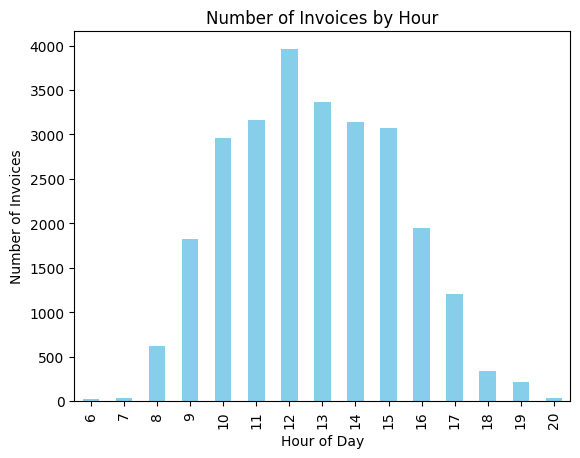

In [100]:
import matplotlib.pyplot as plt

# Ensure 'temp_df' is available and processed (as established in previous cells for InvoiceNo issues)
if 'temp_df' not in globals():
    from ucimlrepo import fetch_ucirepo
    online_retail = fetch_ucirepo(id=352)
    temp_df = online_retail.data.original
    temp_df['InvoiceDate'] = pd.to_datetime(temp_df['InvoiceDate'])

# 1. แปลงคอลัมน์เวลาและสกัดชั่วโมงออกมา (using temp_df)
temp_df['Hour'] = temp_df['InvoiceDate'].dt.hour

# 2. นับจำนวน Invoice (ที่ไม่ซ้ำ) ในแต่ละชั่วโมง
hourly_invoices = temp_df.groupby('Hour')['InvoiceNo'].nunique()

# 3. แสดงผล 5 อันดับชั่วโมงที่มีการซื้อสูงสุด
print("--- 5 อันดับชั่วโมงที่ลูกค้าซื้อของมากที่สุด ---")
print(hourly_invoices.sort_values(ascending=False).head(5))

# 4. วาดกราฟเพื่อให้เห็นภาพชัดเจน
hourly_invoices.plot(kind='bar', color='skyblue')
plt.title('Number of Invoices by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Invoices')
plt.show()

# Individual Assignment – End of Week 3

**Dataset**: Online Retail (UCI Machine Learning Repository)  
**ขนาด**: ~500k rows  
**รูปแบบ**: CSV → SQL analytics

## 🎯 เป้าหมายของงาน

ให้นักศึกษา **จัดการข้อมูลเองตั้งแต่ต้น** และตอบคำถามเชิงวิเคราะห์ด้วย SQL

- ✅ **เน้น** การตั้งคำถามกับข้อมูล + การสรุปเชิงเหตุผล

---

### 🔹 Part 0: ทำความเข้าใจข้อมูล (Warm-up)

ให้นักศึกษาตอบเป็นข้อความสั้น ๆ (ไม่ต้องใช้ SQL ก็ได้)

1. Dataset นี้เกี่ยวกับอะไร
(ตอบ) เป็นข้อมูลการทำธุรกรรม ร้านค้าปลีกออนไลน์ในสหราชอาณาจักร
2. หนึ่งแถว (row) แทน “เหตุการณ์” อะไร
(ตอบ) หนึ่งแถวแทน รายการสินค้า 1 ชนิดที่ถูกซื้อในคำสั่งซื้อนั้นๆ
3. คอลัมน์ใดน่าจะเป็น ตัวระบุสินค้า / ลูกค้า / เวลา
(ตอบ) Description (ชื่อสินค้า) CustomerID (รหัสประจำตัวลูกค้า)
 InvoiceDate (วันที่และเวลาที่เกิดรายการ)

> 🎯 **จุดประสงค์**: วัดว่า “อ่าน data description เป็นไหม”

### 🔹 Part 1: Data Exploration ด้วย SQL (พื้นฐาน)

ให้นักศึกษาสร้าง query เพื่อตอบคำถามต่อไปนี้

1. Dataset นี้มีทั้งหมดกี่แถว
(ตอบ) 541909 rows × 6 columns
2. มีทั้งหมดกี่ประเทศ 38 ประเทศ
(ตอบ) 38 ประเทศ
3. มีสินค้าทั้งหมดกี่รายการ (distinct product)
(ตอบ) 4223 รายการ
4. มีลูกค้าทั้งหมดกี่ราย (CustomerID ที่ไม่เป็น NULL)
(ตอบ) จำนวนลูกค้าทั้งหมด 4372 ราย

> 💡 **Hint**: `COUNT(*)`, `COUNT(DISTINCT ...)`, `WHERE`

### 🔹 Part 2: วิเคราะห์ยอดขาย (Core Analytics)

ให้นศ. คิดว่า “ยอดขาย” ควรนิยามอย่างไร

1. **ยอดขายรวมทั้งหมด** (Total Revenue)
(ตอบ) ยอดขายรวม: 9747747.933999998
2. **ยอดขายรวมต่อประเทศ** (Top 5 ประเทศแรก)
(ตอบ)Top 5 ประเทศ:
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
3. **สินค้าที่ขายได้ยอดรวมสูงสุด 5 อันดับแรก**
(ตอบ) Top 5 สินค้า:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
4. **ลูกค้าที่มียอดซื้อรวมสูงสุด 5 อันดับแรก**
(ตอบ) Top 5 ลูกค้า:
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45

> 💡 **Hint**: `quantity * unitprice`, `GROUP BY`, `ORDER BY`

### 🔹 Part 3: เวลา & พฤติกรรมการซื้อ (Thinking Section)

1. เดือนใดมียอดขายรวมสูงที่สุด
(ตอบ) เดือนที่ยอดขายดีที่สุด 11
2. วันในสัปดาห์ใดมีจำนวน invoice มากที่สุด
(ตอบ)  Thursday
3. ชั่วโมงใดของวันมีการออก invoice มากที่สุด
(ตอบ) 12

> 🎯 **จุดนี้จะบังคับให้นศ.:**  
> - แปลง datetime  
> - เข้าใจว่า “เวลา” มีผลต่อ business insight

### 🔹 Part 4: Data Quality & Anomaly (สำคัญมาก)

1. มีแถวข้อมูลที่ CustomerID เป็น NULL กี่แถว
(ตอบ) 135,080 แถว
2. มี invoice ที่ quantity ติดลบหรือไม่
(ตอบ) 10,624 แถว
3. หากลบข้อมูลผิดปกติออก (quantity ≤ 0 หรือ price ≤ 0)  
   **ยอดขายรวมเปลี่ยนไปหรือไม่ อย่างไร**
(ตอบ) ยอดขายรวมจะ "เพิ่มขึ้น" เพราะในตอนแรกยอดขายรวมถูกหักลบด้วยค่าติดลบ (การคืนของ) เมื่อเราลบแถวที่ Quantity <= 0 หรือ Price <= 0 ออก เราจะเหลือเฉพาะรายการขายที่เป็นบวกจริงๆ

> 🎯 **ตรงนี้คือ สะพานไปบท Data Quality (Week 10)**  
> เด็กจะเริ่มรู้ว่า “ข้อมูลจริงไม่สวย”

### 🔹 Part 5: คำถามเชิงวิเคราะห์ (Open-ended แต่บังคับใช้ SQL)

ให้นักศึกษาเลือก **อย่างน้อย 2 ข้อ**

1. ประเทศใด “มูลค่าต่อ invoice” สูงที่สุด
(ตอบ) Singapore,Netherlands   
2. สินค้าใดถูกซื้อซ้ำบ่อยที่สุด
(ตอบ) WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT
3. ลูกค้าส่วนใหญ่ซื้อของช่วงเวลาใด
(ตอบ) ชั่วโมงที่ 12
4. มี pattern การซื้อที่น่าสนใจอะไรบ้างจากข้อมูลนี้
(ตอบ) The Thursday Peak: วันพฤหัสบดีมักเป็นวันที่มียอดคำสั่งซื้อสูงสุดในสัปดาห์ ในขณะที่ วันเสาร์แทบจะไม่มีการบันทึกรายการเลย (ซึ่งอาจเป็นนโยบายหยุดทำการของบริษัท)

Seasonality: ยอดขายจะโตแบบก้าวกระโดด (Exponential Growth) ตั้งแต่เดือนกันยายนไปจนถึงพฤศจิกายน เพื่อรองรับเทศกาลช่วงท้ายปี

Low Value, High Frequency: สินค้าที่มีราคาต่อหน่วยต่ำ (เช่น ของกระจุกกระจิก) คือตัวดึงดูดลูกค้าให้เข้ามาที่ร้าน แต่รายได้หลักมาจากกลุ่มสินค้าตกแต่งบ้านที่มีราคาสูงขึ้นมาเล็กน้อย

UK vs International: ลูกค้าใน UK ซื้อบ่อยแต่ยอดต่อครั้งน้อย (Retail-like) ส่วนลูกค้าต่างชาติซื้อไม่บ่อยแต่ยอดต่อครั้งมหาศาล (Wholesale-like)
> ✨ **คะแนนส่วนนี้ให้จาก**:  
> - ความสมเหตุสมผล  
> - SQL ที่ใช้  
> - การอธิบาย insight